In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import params
sn.set_style('darkgrid')
sn.set_palette('pastel')
sn.set_color_codes('pastel')

In [2]:
data_path = '/n/fs/fgvc/cos534/data/'
mimic_path = '/n/fs/fgvc/mimiciv/1.0/'


In [3]:
disease_df = pd.read_csv(f'{data_path}melanoma_allFrames.csv')
disease_df.head()

,timestamp,stay_id,anchor_age,patientweight,los,gender,alb,aniongap,bun,crp,...,p-noniv,pnutrition,ponutrition,packedrbc,paralytics,sedation,tpnutrition,vasoactive,vasopressors,hours-p-iv
0,2160-10-17 19:00:00,30062923,79,147.0,1.027708,0,0.00,14.0,14.0,0.0,...,0,0,0,0,0,4,0,0,0,NaN
1,2124-04-08 03:00:00,30065290,75,69.6,2.841146,1,0.00,10.0,21.0,0.0,...,0,0,0,0,0,1,0,0,0,NaN
2,2122-04-22 04:00:00,30066446,83,82.2,6.355139,1,2.65,17.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,NaN
3,2158-06-30 18:00:00,30139247,83,75.0,2.832755,0,0.00,15.0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,NaN
4,2158-07-01 00:00:00,30139247,83,75.0,2.832755,0,0.00,15.0,32.0,0.0,...,0,0,0,0,0,0,0,0,0,NaN


In [4]:
disease_df.columns

Index(['timestamp', 'stay_id', 'anchor_age', 'patientweight', 'los', 'gender',
       'alb', 'aniongap', 'bun', 'crp', 'ca', 'chloride', 'creatinine',
       'fibrinogen', 'glucose', 'hgb', 'k', 'mg', 'na', 'p', 'platelets',
       'troponin', 'wbc', 'apneainterval', 'artco2p', 'arto2p', 'expratio',
       'hr', 'inspratio', 'insptime', 'nibpd', 'nibpm', 'nibps', 'pip', 'rr',
       'spo2', 'temp', 'urine', 'vm', 'vt', 'betablockers', 'ca-iv',
       'ca-noniv', 'cablockers', 'dextrose', 'fluids', 'insulin', 'k-iv',
       'hours-k-iv', 'loopdiuretics', 'mg-iv', 'mg-noniv', 'hours-mg-noniv',
       'p-iv', 'p-noniv', 'pnutrition', 'ponutrition', 'packedrbc',
       'paralytics', 'sedation', 'tpnutrition', 'vasoactive', 'vasopressors',
       'hours-p-iv'],
      dtype='object')

## Basic stats

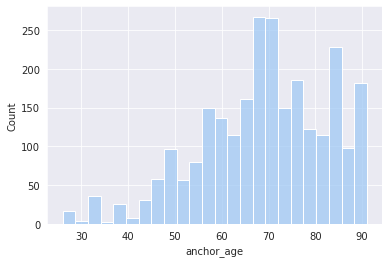

In [5]:
sn.histplot(data=disease_df['anchor_age'])
plt.show()

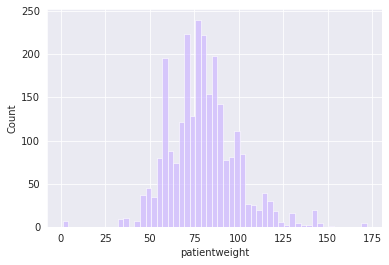

In [6]:
sn.histplot(data=disease_df['patientweight'],color='m')
plt.show()

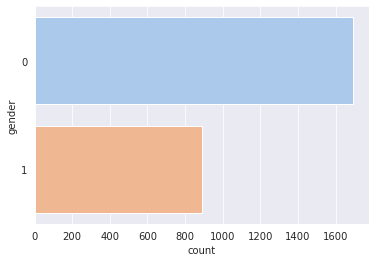

In [7]:
sn.countplot(data=disease_df, y='gender')
plt.show()

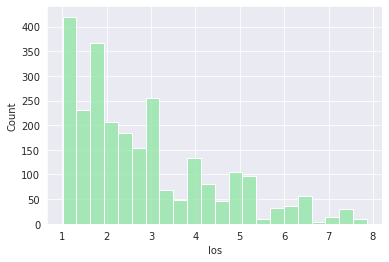

In [8]:
sn.histplot(data=disease_df['los'], color='g')
plt.show()

## Nonzeros vs Zeros for meds, vitals, and labs

In [9]:
nonzero_data = pd.DataFrame(data={'nonzero':'Non-zero', 'count': np.count_nonzero(disease_df, axis=0), 'col': disease_df.columns})

In [10]:
nonzero_data = nonzero_data.append(pd.DataFrame(data={'nonzero':'Zero', 'count': np.count_nonzero(disease_df==0, axis=0), 'col': disease_df.columns}))

In [11]:
nonzero_data = nonzero_data.drop(labels=[0,1,2,3,4,5], axis=0)

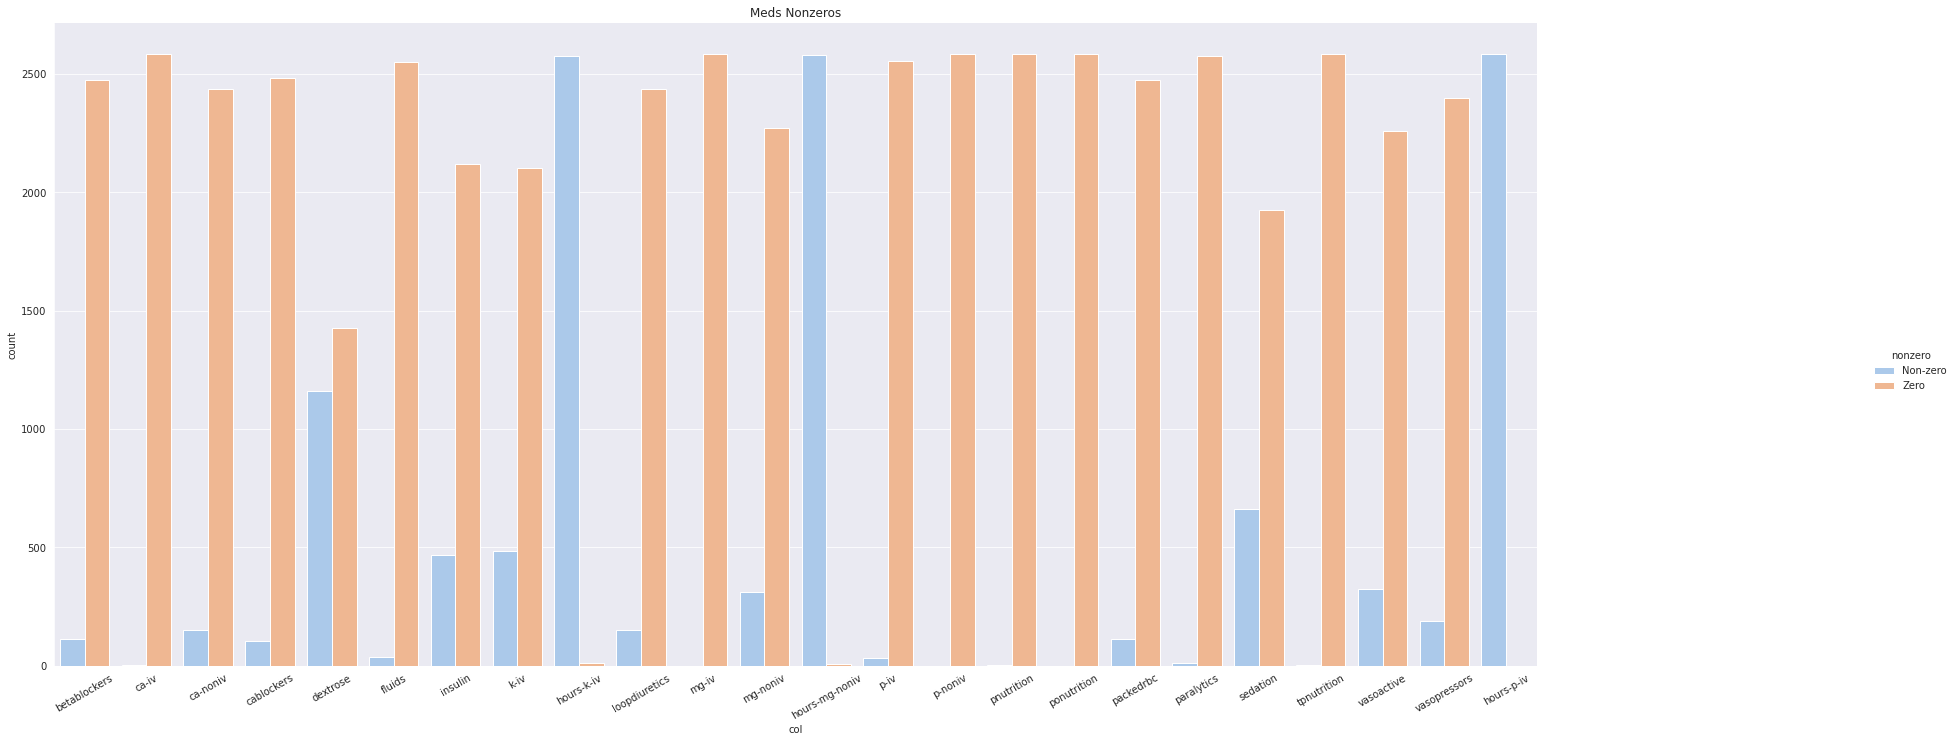

In [12]:
p = sn.catplot(data=nonzero_data[np.isin(nonzero_data['col'], params.meds_list)], x='col', y='count', hue='nonzero', kind='bar')
p.fig.set_figwidth(30)
p.fig.set_figheight(10)
p.set_xticklabels(rotation=30)
plt.title('Meds Nonzeros')
plt.show()

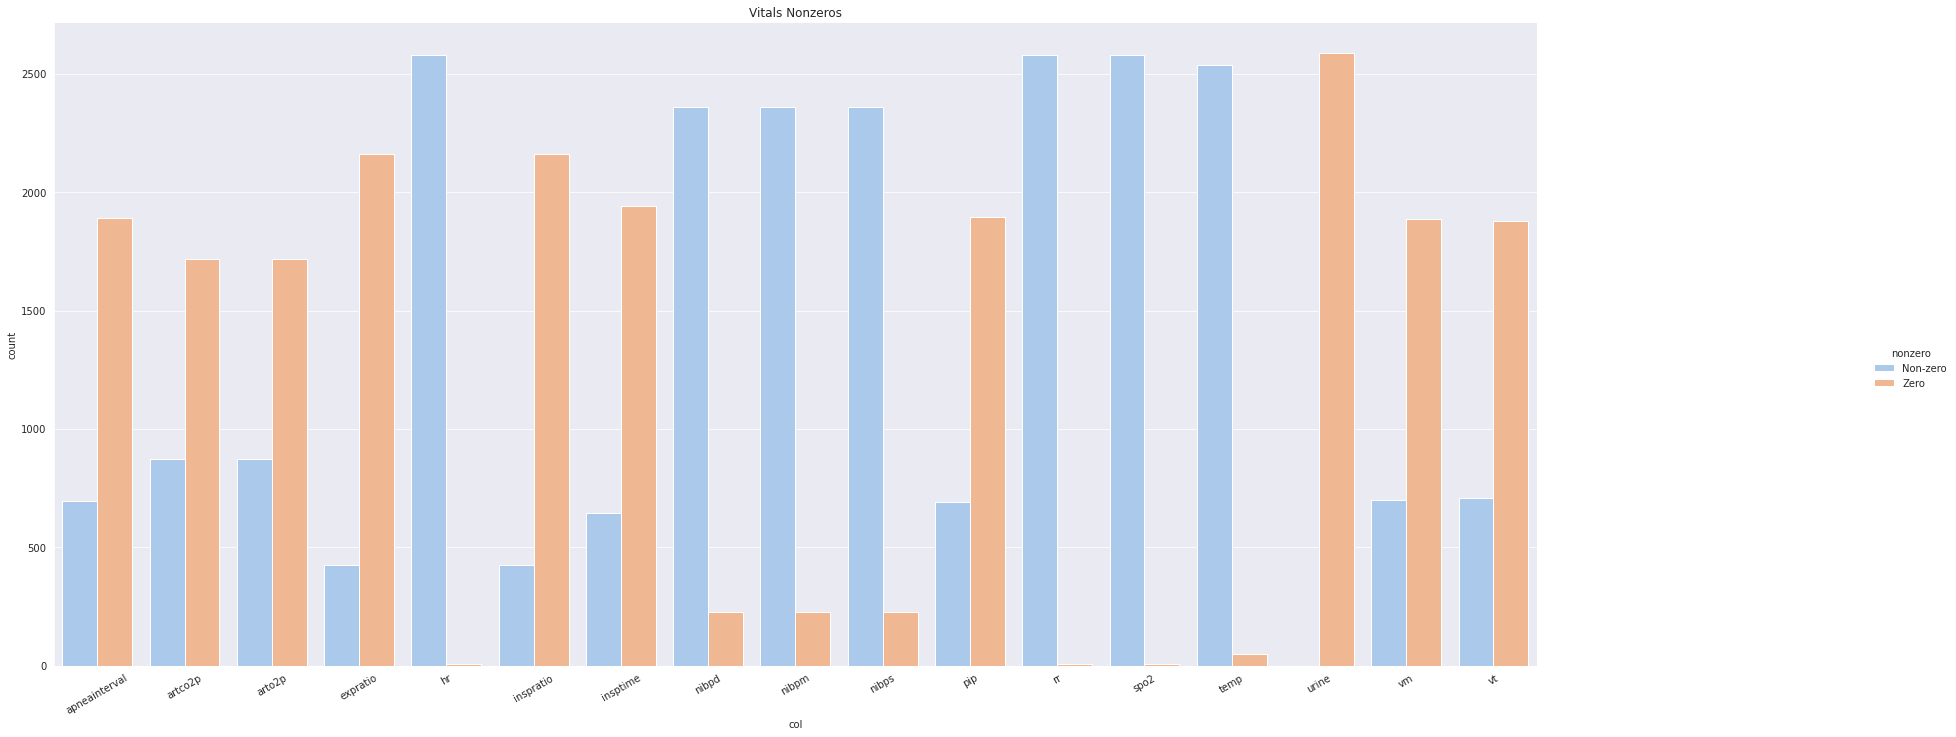

In [13]:
p = sn.catplot(data=nonzero_data[np.isin(nonzero_data['col'], params.vitals_list)], x='col', y='count', hue='nonzero', kind='bar')
p.fig.set_figwidth(30)
p.fig.set_figheight(10)
p.set_xticklabels(rotation=30)
plt.title('Vitals Nonzeros')
plt.show()

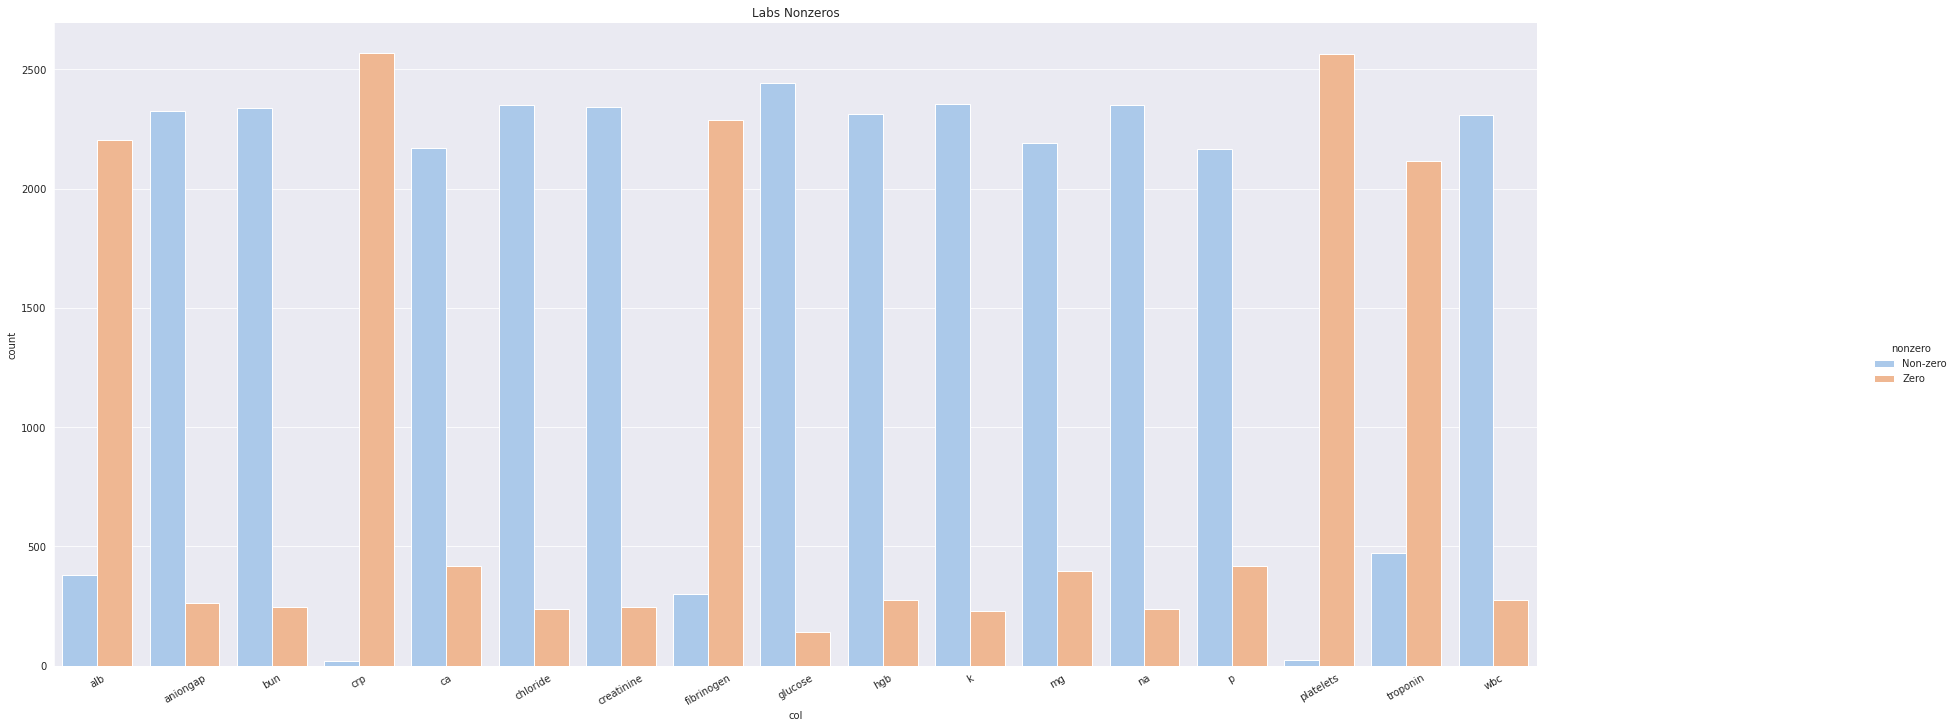

In [14]:
p = sn.catplot(data=nonzero_data[np.isin(nonzero_data['col'], params.labs_list)], x='col', y='count', hue='nonzero', kind='bar')
p.fig.set_figwidth(30)
p.fig.set_figheight(10)
p.set_xticklabels(rotation=30)
plt.title('Labs Nonzeros')
plt.show()

## Meds

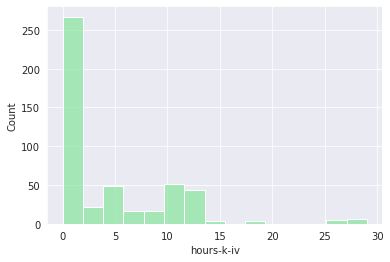

In [15]:
sn.histplot(data=disease_df['hours-k-iv'], color='g')
plt.show()

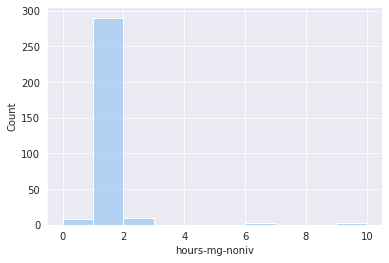

In [16]:
sn.histplot(data=disease_df['hours-mg-noniv'], color='b')
plt.show()

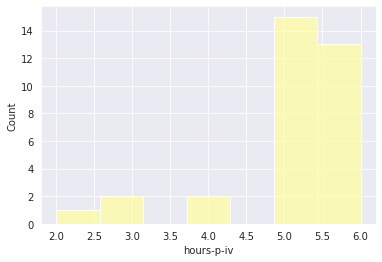

In [17]:
sn.histplot(data=disease_df['hours-p-iv'], color='y')
plt.show()

In [20]:
disease_df.agg('count')['hours-k-iv']

483

In [21]:
disease_df.agg('count')['k-iv']

2587

In [22]:
disease_df['k-iv']

0       40.000001
1       40.000001
2       20.000001
3        0.000000
4        0.000000
          ...    
2582     0.000000
2583     0.000000
2584     0.000000
2585     0.000000
2586     0.000000
Name: k-iv, Length: 2587, dtype: float64